<a href="https://colab.research.google.com/github/Domaakshithareddy/Fruit-Quality-Identification/blob/main/Fruit_Quality_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset loading**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akshithawork","key":"2a8a58f04b0f76977865a2f20916dd83"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d ryandpark/fruit-quality-classification

Dataset URL: https://www.kaggle.com/datasets/ryandpark/fruit-quality-classification
License(s): CC0-1.0


In [5]:
import zipfile
import os

dataset_path = "fruit-quality-classification.zip"  # Ensure this matches the downloaded filename
extract_path = "fruit_quality_data"  # Folder to extract to

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
os.listdir(extract_path)

['Bad Quality_Fruits', 'Good Quality_Fruits', 'Mixed Qualit_Fruits']

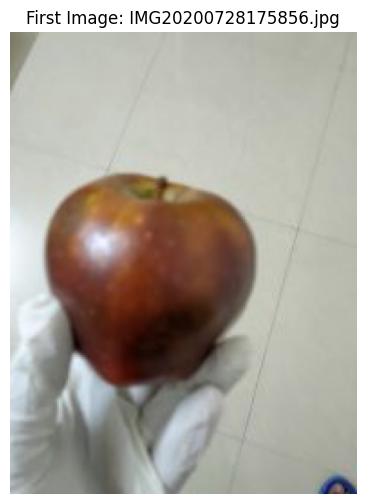

In [6]:
import matplotlib.pyplot as plt
import cv2
import os

# Define the path to the first image
image_folder = "fruit_quality_data/Bad Quality_Fruits/Apple_Bad"
image_files = sorted(os.listdir(image_folder))  # Sort to get consistent order
first_image_path = os.path.join(image_folder, image_files[0])

# Read and display the image
image = cv2.imread(first_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Show the image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
plt.title("First Image: " + image_files[0])
plt.show()
